In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import zscore

# Cleaning the data

After obtaining the data in several different dataframes(that was how my scraping function worked), I needed to clean it. Delete unnecessary strings and symbols (such as $), replace 'K' with 000 and 'M' with 000,000, and concatenate all the dataframes together. Also I needed to create two columns with binary data: is the product 'clean', no harsh chemicals(1/0), did the product win the award(1/0).

In [139]:
def clean_data(df):
    
    #split the word 'reviews' and actual value into separate columns, drop unneeded
    new = df["Reviews"].str.split(" ", n = 1, expand = True) 
    df["Reviews_Count"]= new[0]  
    df["Blah"]= new[1] 
    df.drop(columns =["Reviews"], inplace = True) 
    df.drop(['Blah'], axis=1, inplace=True)
    
    #doing the same for reviews, aka hearts
    new = df["Rating"].str.split(" ", n = 1, expand = True) 
    df["Hearts"]= new[0] 
    df["word"]= new[1] 
    df.drop(columns =["Rating"], inplace = True) 
    df.drop(['word'], axis=1, inplace=True)
    
    #finding and replacing K with 000
    df["Hearts"] = df['Hearts'].replace(to_replace='K', value='000', regex=True)
    df["Hearts"] = df['Hearts'].replace(to_replace='M', value='000000', regex=True)
    df['Reviews_Count'] = df['Reviews_Count'].replace(to_replace='K', value='000', regex=True)
    
    #finding and deleting $ in price column and deleting double prices, keeping only the most up-to-date
    df["Price"] = df['Price'].replace(to_replace='\$', value='', regex=True)
    df["Price"] = df['Price'].replace(to_replace='\s\w+\.\w+', value='', regex=True)
    df["Price"] = df["Price"].replace(to_replace='\\n.+', value='', regex=True)
    
    #converting numeric data into floats
    df["Price"] = df['Price'].astype(float)
    df["Hearts"] = df['Hearts'].astype(float)
    df['Reviews_Count'] = df['Reviews_Count'].astype(float)
    
    return df

In [37]:
#concatenate all gathered data
df99 = pd.read_csv('big_sephora_table99.csv')
df59 = pd.read_csv('big_sephora_table59.csv')
df9 = pd.read_csv('big_sephora_table9.csv')
df6 = pd.read_csv('big_sephora_table6.csv')
df49 = pd.read_csv('big_sephora_table49.csv')
df71 = pd.read_csv('big_sephora_table71.csv')
df214 = pd.read_csv('big_sephora_table214.csv')
df999 = pd.read_csv('big_sephora_table999.csv')
df233 = pd.read_csv('big_sephora_table233.csv')
df497 = pd.read_csv('big_sephora_table497.csv')
df824 = pd.read_csv('big_sephora_table824.csv')

frames = [df99, df59, df9, df6, df49, df71, df214, df999, df233, df497, df824]
df = pd.concat(frames, ignore_index=True)

/Users/agorina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  from ipykernel import kernelapp as app


In [38]:
df.shape

(3069, 6)

In [60]:
df.to_csv('/Users/agorina/Desktop/Flatiron/huge_sephora_df.csv')

In [61]:
df.tail()

,Brand,Price,Product,Unnamed: 0.1,Reviews_Count,Hearts
3064,IGK,27.0,Speechless Dry Oil Finishing Spray for Hair an...,820,34,8000
3065,PHILOSOPHY,30.0,Amazing Grace Satin-Finish Body Oil Mist,821,50,5.8000
3066,ELLIS BROOKLYN,55.0,Verb Excellent Body Milk,822,4,844
3067,LANCÔME,50.0,La Vie Est Belle Body Lotion,823,9,1.5000
3068,JO MALONE LONDON,84.0,English Pear & Freesia Body Crème,824,7,1.7000


In [62]:
df.drop(['Unnamed: 0.1'], axis=1, inplace=True)

In [66]:
dfs = pd.read_csv('/Users/agorina/Desktop/Flatiron/Sephora_Classification/Data/huge_sephora_df.csv')

In [67]:
dfs.head()

,Unnamed: 0,Brand,Price,Product,Unnamed: 0.1,Reviews_Count,Hearts
0,0,ARMANI BEAUTY,38.0,Lip Maestro Liquid Lipstick,0,1000,171.7000
1,1,CHARLOTTE TILBURY,34.0,Matte Revolution Lipstick,1,719,135.3000
2,2,TATCHA,28.0,The Kissu Lip Mask,2,262,41.3000
3,3,GIVENCHY,38.0,Le Rouge Lipstick,3,640,111.2000
4,4,NARS,27.0,Velvet Matte Lipstick Pencil,4,5000,350.4000


In [69]:
dfs.drop(['Unnamed: 0.1'], axis=1, inplace=True)

In [70]:
dfs.drop(['Unnamed: 0'], axis=1, inplace=True)

In [77]:
dfs["Hearts"] = dfs['Hearts'].replace(to_replace='M', value='000000', regex=True)

In [78]:
dfs.head()

,Brand,Price,Product,Reviews_Count,Hearts
0,ARMANI BEAUTY,38.0,Lip Maestro Liquid Lipstick,1000,171.7000
1,CHARLOTTE TILBURY,34.0,Matte Revolution Lipstick,719,135.3000
2,TATCHA,28.0,The Kissu Lip Mask,262,41.3000
3,GIVENCHY,38.0,Le Rouge Lipstick,640,111.2000
4,NARS,27.0,Velvet Matte Lipstick Pencil,5000,350.4000


In [79]:
dfs.dtypes

Brand             object
Price            float64
Product           object
Reviews_Count      int64
Hearts            object
dtype: object

In [80]:
dfs["Hearts"] = dfs['Hearts'].astype(float)

In [83]:
dfs.dtypes

Brand             object
Price            float64
Product           object
Reviews_Count      int64
Hearts           float64
dtype: object

In [85]:
dfs.to_csv('/Users/agorina/Desktop/Flatiron/Cleaned_Sephora_dfs.csv', index=False)

In [3]:
seph_table = pd.read_csv('/Users/agorina/Desktop/Flatiron/Sephora_Classification/Data/Cleaned_Sephora_df.csv')
seph_table.head()
seph_table.shape

(3069, 6)

In [142]:
allu_table = pd.read_csv('/Users/agorina/Desktop/Flatiron/Sephora_Classification/Data/allure_sephora_table80.csv')
allu_table.drop(['Unnamed: 0'], axis=1, inplace=True)
allu_table.head()
allu_table.shape

(81, 5)

In [143]:
cleaned_allu = clean_data(allu_table)

In [145]:
cleaned_allu.head()

,Brand,Product,Price,Reviews_Count,Hearts
0,DRUNK ELEPHANT,Slaai™ Makeup-Melting Butter Cleanser,34.0,817.0,46.4
1,LANEIGE,Lip Sleeping Mask,20.0,8000.0,309.1
2,MILK MAKEUP,Hydro Grip Primer,30.0,1000.0,66.3
3,FENTY BEAUTY BY RIHANNA,Mattemoiselle Plush Matte Lipstick,18.0,2000.0,329.5
4,DYSON,Airwrap™ Styler,549.0,456.0,43.8


BINARY DATA!!!

In [88]:
cls = []

In [89]:
cnamesdf1 = pd.read_csv('/Users/agorina/Desktop/Flatiron/Sephora_Classification/Data/clean1.csv')
clean_names_list1 = cnamesdf1['0'].tolist()
cls.append(clean_names_list1)

In [90]:
cnamesdf2 = pd.read_csv('/Users/agorina/Desktop/Flatiron/Sephora_Classification/Data/clean2.csv')
clean_names_list2 = cnamesdf2['0'].tolist()
cls.append(clean_names_list2)

In [91]:
cnamesdf3 = pd.read_csv('/Users/agorina/Desktop/Flatiron/Sephora_Classification/Data/clean3.csv')
clean_names_list3 = cnamesdf3['0'].tolist()
cls.append(clean_names_list3)

In [92]:
cnamesdf4 = pd.read_csv('/Users/agorina/Desktop/Flatiron/Sephora_Classification/Data/clean4.csv')
clean_names_list4 = cnamesdf4['0'].tolist()
cls.append(clean_names_list4)

In [93]:
len(cls)

4

In [95]:
clnms = [item for sublist in cls for item in sublist]

In [124]:
len(clnms)

846

In [163]:
clean_names = clnms
clean_names

['Changemaker Supercharged Micellar Foundation',
 'Wet Lip Oil Gloss',
 'Limitless Lash Mascara',
 'SEA Water Foundation Broad Spectrum SPF 15',
 'Power Move Creamy Matte Lip Crayon',
 'SEA Surfer Curl™ Volumizing Mascara',
 'Tinted Face Oil Foundation',
 'Phyto-Medic Eyelash Enhancer',
 'SEA Quench Lip Rescue Balm',
 'The Silk Canvas Protective Primer Mini',
 'Changemaker Skin-Optimizing Primer',
 'Liquid Glass Radiance Serum',
 'Agave+ Daytime Vegan Lip Balm',
 'Unicorn Essence Antioxidant Primer Serum',
 'Un Cover-Up Concealer/Foundation',
 'True Skin Serum Foundation',
 'SEA Aquacealer Concealer',
 'Skintune Blur Perfecting Primer Serum',
 'Limitless Lash Mascara Mini',
 'Vibrancy Argan Oil Foundation Fluid',
 'Rose Gold Elixir – 24k Gold Infused Beauty Oil',
 'Agave+ Intensive Vegan Lip Mask',
 'Changemaker Flexible Coverage Pressed Powder',
 'Living Luminizer',
 'ShineOn Jelly Lip Gloss',
 'SEA Color Splash Lipstick',
 'BeachPlease Tinted Lip + Cheek Balm',
 'Total Cover Cream Fo

In [128]:
allu = pd.read_csv('/Users/agorina/Desktop/Flatiron/Sephora_Classification/Data/Allure_Names_List.csv')
allure_names = allu['0'].tolist()

len(allure_names)
#allure_names

82

In [164]:
#To check if the name is in clean
clean = []
for value in seph_table['Product']:
    if value in clean_names:
        clean.append(1)
    else: 
        clean.append(0)
        
seph_table['Clean'] = clean

seph_table.tail()

,Brand,Price,Product,Reviews_Count,Hearts,Allure,Clean
3064,IGK,27.0,Speechless Dry Oil Finishing Spray for Hair an...,34,8000.0,0,0
3065,PHILOSOPHY,30.0,Amazing Grace Satin-Finish Body Oil Mist,50,5.8,0,0
3066,ELLIS BROOKLYN,55.0,Verb Excellent Body Milk,4,844.0,0,1
3067,LANCÔME,50.0,La Vie Est Belle Body Lotion,9,1.5,0,0
3068,JO MALONE LONDON,84.0,English Pear & Freesia Body Crème,7,1.7,0,0


In [146]:
clean = []
for value in cleaned_allu['Product']:
    if value in clean_names:
        clean.append(1)
    else: 
        clean.append(0)
        
cleaned_allu['Clean'] = clean

cleaned_allu.tail()

,Brand,Product,Price,Reviews_Count,Hearts,Clean
76,LANCÔME,Monsieur Big Mascara,25.0,2000.0,42.6,0
77,SACHAJUAN,Colour Protect Conditioner,33.0,2.0,371.0,0
78,SEPHORA COLLECTION,PRO Featherweight Complexion Brush #90,34.0,180.0,20.1,0
79,KIEHL'S SINCE 1851,Creme de Corps Nourishing Dry Body Oil,35.0,73.0,11.4,0
80,LANCER,Clarifying Detox Mask with Green Tea + 3% Sulfur,75.0,196.0,1.7,0


In [148]:
cleaned_allu.head()

,Brand,Product,Price,Reviews_Count,Hearts,Clean
0,DRUNK ELEPHANT,Slaai™ Makeup-Melting Butter Cleanser,34.0,817.0,46.4,1
1,LANEIGE,Lip Sleeping Mask,20.0,8000.0,309.1,0
2,MILK MAKEUP,Hydro Grip Primer,30.0,1000.0,66.3,0
3,FENTY BEAUTY BY RIHANNA,Mattemoiselle Plush Matte Lipstick,18.0,2000.0,329.5,0
4,DYSON,Airwrap™ Styler,549.0,456.0,43.8,0


In [155]:
#to check if it won the award
allure = []
for value in cleaned_allu["Product"]:
    if value in allure_names:
        allure.append(1)
    else:
        allure.append(0)
        
cleaned_allu['Allure'] = allure

cleaned_allu.tail()

,Brand,Product,Price,Reviews_Count,Hearts,Clean,Allure
76,LANCÔME,Monsieur Big Mascara,25.0,2000.0,42.6,0,1
77,SACHAJUAN,Colour Protect Conditioner,33.0,2.0,371.0,0,1
78,SEPHORA COLLECTION,PRO Featherweight Complexion Brush #90,34.0,180.0,20.1,0,1
79,KIEHL'S SINCE 1851,Creme de Corps Nourishing Dry Body Oil,35.0,73.0,11.4,0,1
80,LANCER,Clarifying Detox Mask with Green Tea + 3% Sulfur,75.0,196.0,1.7,0,1


In [156]:
allure = []
for value in seph_table["Product"]:
    if value in allure_names:
        allure.append(1)
    else:
        allure.append(0)
        
seph_table['Allure'] = allure



In [165]:
seph_table.head()

,Brand,Price,Product,Reviews_Count,Hearts,Allure,Clean
0,ARMANI BEAUTY,38.0,Lip Maestro Liquid Lipstick,1000,171.7,1,0
1,CHARLOTTE TILBURY,34.0,Matte Revolution Lipstick,719,135.3,0,0
2,TATCHA,28.0,The Kissu Lip Mask,262,41.3,0,1
3,GIVENCHY,38.0,Le Rouge Lipstick,640,111.2,0,0
4,NARS,27.0,Velvet Matte Lipstick Pencil,5000,350.4,0,0


In [158]:
seph_table['Allure'].value_counts()

0    3021
1      48
Name: Allure, dtype: int64

In [159]:
cleaned_allu['Allure'].value_counts()

1    81
Name: Allure, dtype: int64

In [160]:
cleaned_allu.shape

(81, 7)

In [169]:
seph_table_ord = seph_table[['Brand', 'Product', 'Price', 'Reviews_Count', 'Hearts', 'Clean', 'Allure']]

In [171]:
cleaned_allu_ord = cleaned_allu[['Brand', 'Product', 'Price', 'Reviews_Count', 'Hearts', 'Clean', 'Allure']]

In [170]:
seph_table_ord.head()

,Brand,Product,Price,Reviews_Count,Hearts,Clean,Allure
0,ARMANI BEAUTY,Lip Maestro Liquid Lipstick,38.0,1000,171.7,0,1
1,CHARLOTTE TILBURY,Matte Revolution Lipstick,34.0,719,135.3,0,0
2,TATCHA,The Kissu Lip Mask,28.0,262,41.3,1,0
3,GIVENCHY,Le Rouge Lipstick,38.0,640,111.2,0,0
4,NARS,Velvet Matte Lipstick Pencil,27.0,5000,350.4,0,0


In [172]:
cleaned_allu_ord.head()

,Brand,Product,Price,Reviews_Count,Hearts,Clean,Allure
0,DRUNK ELEPHANT,Slaai™ Makeup-Melting Butter Cleanser,34.0,817.0,46.4,1,1
1,LANEIGE,Lip Sleeping Mask,20.0,8000.0,309.1,0,1
2,MILK MAKEUP,Hydro Grip Primer,30.0,1000.0,66.3,0,1
3,FENTY BEAUTY BY RIHANNA,Mattemoiselle Plush Matte Lipstick,18.0,2000.0,329.5,0,1
4,DYSON,Airwrap™ Styler,549.0,456.0,43.8,0,1


In [173]:
frame_s = [seph_table_ord, cleaned_allu_ord]
DF = pd.concat(frame_s, ignore_index=True)

In [174]:
DF.head()

,Brand,Product,Price,Reviews_Count,Hearts,Clean,Allure
0,ARMANI BEAUTY,Lip Maestro Liquid Lipstick,38.0,1000.0,171.7,0,1
1,CHARLOTTE TILBURY,Matte Revolution Lipstick,34.0,719.0,135.3,0,0
2,TATCHA,The Kissu Lip Mask,28.0,262.0,41.3,1,0
3,GIVENCHY,Le Rouge Lipstick,38.0,640.0,111.2,0,0
4,NARS,Velvet Matte Lipstick Pencil,27.0,5000.0,350.4,0,0


In [175]:
DF.Allure.value_counts()

0    3021
1     129
Name: Allure, dtype: int64

In [153]:
DF.shape

(3150, 7)

In [176]:
DF_dd = DF.drop_duplicates('Product')

In [177]:
DF_dd.shape

(2000, 7)

In [178]:
DF_dd.Allure.value_counts()

0    1919
1      81
Name: Allure, dtype: int64

In [179]:
DF_dd.to_csv('/Users/agorina/Desktop/Flatiron/True_Final_Sephora.csv', index=False)

In [106]:
seph_table.shape

(3069, 7)

In [108]:
seph_table_dd = seph_table.drop_duplicates('Product')

In [109]:
seph_table_dd.shape

(1954, 7)

In [110]:
seph_table_dd.to_csv('/Users/agorina/Desktop/Flatiron/Final_Sephora_df.csv', index=False)

In [113]:
seph_table['Allure'].value_counts()

0    3059
1      10
Name: Allure, dtype: int64

In [112]:
seph_table_dd['Clean'].value_counts()

0    1744
1     210
Name: Clean, dtype: int64

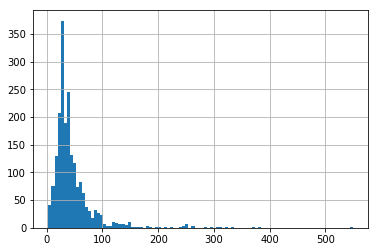

In [181]:
DF_dd['Price'].hist(bins=100)

In [182]:
DF_dd['Price'].mean()

45.266704999999995